In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
import pickle
from statistics import mean

data = pd.read_csv('donation_final3.csv')
# Separating the dependent and independent variables
y = data['Quantity']
X = data.drop('Quantity', axis = 1)

# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
X_test



,datetime
12914,2020.312329
45485,2019.531507
45126,2019.347945
56681,2020.139726
23391,2018.923288
...,...
52466,2019.249315
44383,2019.600000
5550,2019.619178
23370,2018.912329


In [4]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
pickle.dump(linearModel, open('linearModel.pkl', 'wb'))
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

8.232516430195513e-05


In [5]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
  
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
#Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -1.7930497466650985
0.5 : -1.7930467501572158
0.75 : -1.7930437537638022
1.0 : -1.793040757484756
1.25 : -1.7930377613202209
1.5 : -1.7930347652700684
1.75 : -1.7930317693343931
2.0 : -1.7930287735131512


In [6]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
pickle.dump(ridgeModel, open('ridgeModel.pkl', 'wb'))
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))


# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

8.245097589754113e-05
0.25 : -1.7711158644714686
0.5 : -1.6786248426809203
0.75 : -1.6503241132841584
1.0 : -1.6503241132841584
1.25 : -1.6503241132841584
1.5 : -1.6503241132841584
1.75 : -1.6503241132841584
2.0 : -1.6503241132841584


In [7]:

# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
pickle.dump(lassoModel, open('lassoModel.pkl', 'wb'))
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

-3.5272384724116534e-07


In [8]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 8.232516430195513e-05
Ridge Regression : 8.245097589754113e-05
Lasso Regression : -3.5272384724116534e-07


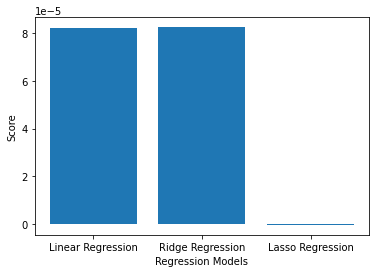

In [9]:
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

In [19]:
import pickle
import financialanalysis as fa
with open('lassoModel.pkl', 'rb') as f1:
    model1 = pickle.load(f1)
with open('linearModel.pkl', 'rb') as f2:
    model2 = pickle.load(f2)
with open('ridgeModel.pkl', 'rb') as f3:
    model3 = pickle.load(f3)
y="2022-1-23"
y=fa.datetimeToFloatyear(fa.stringToDatetime(y))
ypred1=int(model1.predict(st[[y]])[0])
ypred2=int(model2.predict([[y]])[0])
ypred3=int(model3.predict([[y]])[0])
if ypred1 > 0 and ypred2 > 0 and ypred3 > 0:
    out="Input => "+str(y)+" LASSO MODEL PREDICTION => "+str(ypred1)+" LINEAR MODEL PREDICTION => "+str(ypred2)+" RIDGE MODEL PREDICTION => "+str(ypred3)    
elif ypred1 < 0 and ypred2 < 0 and ypred3 < 0: 
    out="Input => "+str(y)+" Output => enter the corrent date"

C:\Users\SHAHMEER\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=[.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
out

'Input => 2022.0630136986301 LASSO MODEL PREDICTION => 44 LINEAR MODEL PREDICTION => 41 RIDGE MODEL PREDICTION => 41'